In [1]:
# Importacion de librerias

import os
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid


In [3]:
# Transformaciones de datos para entrenamiento y prueba

train_transforms = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(96, scale=(0.8, 1.0)),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
])


In [5]:
# Carga de datasets y dataloaders

train_dir = r"C:\Users\CaRa801\OneDrive - HP Inc\Knowledge transfer Gerard Costa\Bootcamp en IA\Sprint 2\Lab4\Ejercicio autoevaluable\images\seg_train"
test_dir = r"C:\Users\CaRa801\OneDrive - HP Inc\Knowledge transfer Gerard Costa\Bootcamp en IA\Sprint 2\Lab4\Ejercicio autoevaluable\images\seg_test"

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

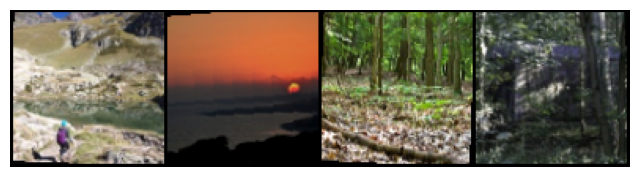

In [6]:
# Visualizacion de un lote de imagenes

def show_batch(dl):
    images, labels = next(iter(dl))
    img_grid = make_grid(images[:4])
    plt.figure(figsize=(8, 8))
    plt.imshow(img_grid.permute(1, 2, 0))
    plt.axis("off")
    plt.show()

show_batch(train_loader)


In [7]:
# Definicion de la red neuronal

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 16x48x48
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32x24x24
        )
        self.fc_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 24 * 24, 128),
            nn.ReLU(),
            nn.Linear(128, 6)  # 6 clases
        )

    def forward(self, x):
        x = self.conv_block(x)
        return self.fc_block(x)

model = SimpleCNN().to(device)


In [ ]:
# Configuracion de la funcion de perdida y el optimizador

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)


In [9]:
# Funcion de entrenamiento y evaluacion

def train_model(model, train_loader, test_loader, epochs=30):
    train_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = 100 * correct / total
        test_accuracies.append(acc)

        print(f"Época [{epoch+1}/{epochs}] - Pérdida: {avg_loss:.4f} - Precisión: {acc:.2f}%")

    return train_losses, test_accuracies


In [10]:
# Entrenamiento del modelo

train_losses, test_accuracies = train_model(model, train_loader, test_loader)


Época [1/30] - Pérdida: 1.3340 - Precisión: 56.63%
Época [2/30] - Pérdida: 1.1075 - Precisión: 64.67%
Época [3/30] - Pérdida: 1.0053 - Precisión: 65.20%
Época [4/30] - Pérdida: 0.9716 - Precisión: 66.37%
Época [5/30] - Pérdida: 0.9477 - Precisión: 68.57%
Época [6/30] - Pérdida: 0.9142 - Precisión: 69.97%
Época [7/30] - Pérdida: 0.8946 - Precisión: 67.17%
Época [8/30] - Pérdida: 0.8818 - Precisión: 70.50%
Época [9/30] - Pérdida: 0.8579 - Precisión: 71.03%
Época [10/30] - Pérdida: 0.8384 - Precisión: 72.73%
Época [11/30] - Pérdida: 0.8192 - Precisión: 72.43%
Época [12/30] - Pérdida: 0.8065 - Precisión: 73.33%
Época [13/30] - Pérdida: 0.7935 - Precisión: 72.43%
Época [14/30] - Pérdida: 0.7820 - Precisión: 74.60%
Época [15/30] - Pérdida: 0.7741 - Precisión: 74.00%
Época [16/30] - Pérdida: 0.7641 - Precisión: 74.80%
Época [17/30] - Pérdida: 0.7528 - Precisión: 74.33%
Época [18/30] - Pérdida: 0.7532 - Precisión: 75.17%
Época [19/30] - Pérdida: 0.7360 - Precisión: 75.67%
Época [20/30] - Pérdi

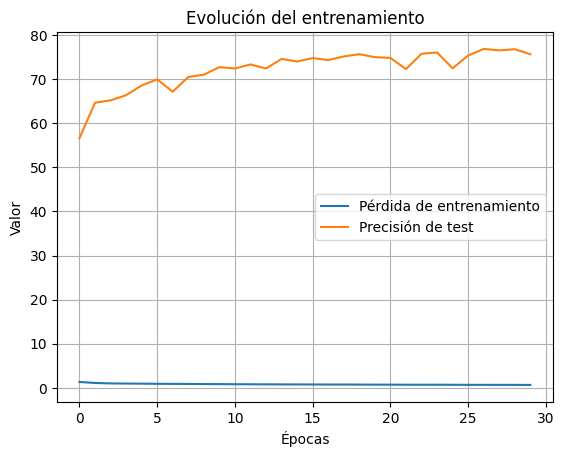

In [11]:
# Visualizacion de resultados

plt.plot(train_losses, label="Pérdida de entrenamiento")
plt.plot(test_accuracies, label="Precisión de test")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Evolución del entrenamiento")
plt.legend()
plt.grid(True)
plt.show()
